In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import seed
from numpy.random import randint

To begin, we start with the base code for selection sort as described in chapter 2 of Grokking Algorithms (Bhargava 2016) which can be found here: 
https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_selection_sort.py

In [16]:
# The Grokking code creates a function to find the smallest value in an array. That function is that called in 
# another created function to sort the array

# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
    newArr = []
    arrList = arr.tolist()
    for i in range(len(arrList)):
        smallest = findSmallest(arrList) #Finds the smallest in the array
        newArr.append(arrList.pop(smallest))
    return newArr

In [19]:
# Create a comparison sorting method that does not use the pop function, as pop will not work on numpy arrays.
# Our third sorting method to compare against will use the built-in sorting function in Numpy

def selectionSortNumpy(arr):
    arr = np.array(arr)
    for i in range(len(arr)):
        j = arr[i:].argmin()
        arr[i], arr[i + j] = arr[i + j], arr[i]
    return arr

We will set up five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  Ensure that a common random number seed is used to generate each of the arrays. 

In [17]:
# Per feedback, we'll use a loop rather than creating arrays one by one
# Array sizes follow what is required....seeding is set to 1000 for testing purposes

arraySizes = (5000, 10000, 15000, 20000, 25000)

myArray = dict()

for size in arraySizes:
    seed(1000)
    myArray[size] = randint(99999, size = size)

Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the execution time with each execution. Use one of the timing methods we learned in class.

In [18]:
# Will create arrays based on Grokking guide
# Multiplies time at the end by 1000 to convert to miliseconds

start = time.perf_counter()
sort5 = selectionSort(myArray[5000])
stop  = time.perf_counter()
time5 = (stop - start)*1000 

start = time.perf_counter()
sort10 = selectionSort(myArray[10000])
stop  = time.perf_counter()
time10 = (stop - start)*1000

start = time.perf_counter()
sort15 = selectionSort(myArray[15000])
stop = time.perf_counter()
time15 = (stop - start)*1000

start = time.perf_counter()
sort20 = selectionSort(myArray[20000])
stop = time.perf_counter()
time20 = (stop - start)*1000

start = time.perf_counter()
sort25 = selectionSort(myArray[25000])
stop = time.perf_counter()
time25 = (stop - start)*1000

In [20]:
# Repeating the same process but for the Numpy based sorting method
# Multiplies time at the end by 1000 to convert to miliseconds

start = time.perf_counter()
sort5n = selectionSortNumpy(myArray[5000])
stop = time.perf_counter()
time5n = (stop - start)*1000

start = time.perf_counter()
sort10n = selectionSortNumpy(myArray[10000])
stop = time.perf_counter()
time10n = (stop - start)*1000 

start = time.perf_counter()
sort15n = selectionSortNumpy(myArray[15000])
stop = time.perf_counter()
time15n = (stop - start)*1000 

start = time.perf_counter()
sort20n = selectionSortNumpy(myArray[20000])
stop = time.perf_counter()
time20n = (stop - start)*1000 

start = time.perf_counter()
sort25n = selectionSortNumpy(myArray[25000])
stop = time.perf_counter()
time25n = (stop - start)*1000 

In [21]:
# As a third comparison, let's look at the built in sort function for numpy
# Multiplies time at the end by 1000 to convert to miliseconds

start = time.perf_counter()
sort5np = np.sort(myArray[5000])
stop  = time.perf_counter()
time5np = (stop - start)*1000 

start = time.perf_counter()
sort10np = np.sort(myArray[10000])
stop  = time.perf_counter()
time10np = (stop - start)*1000 

start = time.perf_counter()
sort15np = np.sort(myArray[15000])
stop = time.perf_counter()
time15np = (stop - start)*1000 

start = time.perf_counter()
sort20np = np.sort(myArray[20000])
stop = time.perf_counter()
time20np = (stop - start)*1000 

start = time.perf_counter()
sort25np = np.sort(myArray[25000])
stop = time.perf_counter()
time25np = (stop - start)*1000 

Organize the results of the study into a table showing the size of data array and the time taken to sort the array. Discuss the differences in timing and how they relate to data type and length of array.  

In [22]:
results = pd.DataFrame(np.array([['Array Size', 'Grokking Sort Time', 'Numpy based Sort Time', 
                                    'Numpy Built-In Sort Time'],
                     [5000, round(time5,6), round(time5n,6), round(time5np,6)],
                     [10000, round(time10,6), round(time10n,6), round(time10np,6)],
                     [15000, round(time15,6), round(time15n,6), round(time15np,6)],
                     [20000, round(time20,6), round(time20n,6), round(time20np,6)],
                     [25000, round(time25,6), round(time25n,6), round(time25np,6)]]))
print("Run times for sorting alogrithms, in milliseconds:")
results

Run times for sorting alogrithms, in milliseconds:


,0,1,2,3
0,Array Size,Grokking Sort Time,Numpy based Sort Time,Numpy Built-In Sort Time
1,5000,757.6553,27.3673,17.1907
2,10000,2655.987,75.0317,0.568
3,15000,5739.5038,146.4504,1.1616
4,20000,9979.9511,246.5612,1.1044
5,25000,15506.2991,363.7408,1.4299


Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against problem size for each form of the algorithm being tested.

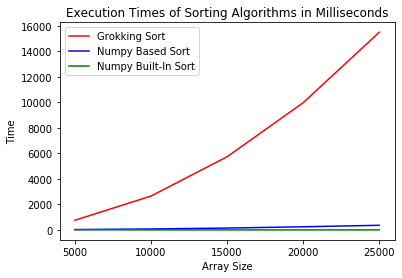

In [24]:
plt.plot([5000, 10000, 15000, 20000, 25000],
        [time5, time10, time15, time20, time25],
        'r-',
        [5000, 10000, 15000, 20000, 25000],
        [time5n, time10n, time15n, time20n, time25n],
        'b-',
        [5000, 10000, 15000, 20000, 25000],
        [time5np, time10np, time15np, time20np, time25np],
        'g-')
plt.xlabel('Array Size')
plt.ylabel('Time')
plt.title('Execution Times of Sorting Algorithms in Milliseconds')
plt.legend(['Grokking Sort', 'Numpy Based Sort', 'Numpy Built-In Sort'])
plt.xticks(np.arange(5000, 30000, 5000))
plt.show()

Executive Summary

In this exercise we compared three different sorting algorithms in terms of execution time. The first sorting algorithm we used is based on the Grokking textbook. The second sorting algorithm we used is based on the numpy library and is a simple sort. The third sorting algorithm we used is the sorting function from the numpy library: one of the most basic form of sorting we have available. To compare the sorting times, we tasked each algorithm we sorting 5 different sized arrays: 5000, 1000, 15000, 20000, and 25000.

As one can see in the chart above, the Grokking algorithm performed the slowest at a Big O notation of O(n^2). The second and third sorting methods performed much better than the Grokking methodology, however the second sorting algorithm fared better than the third. The chart is skewed because of the Grokking algorithm, and it’s safe to say to the second performed substantially better than the third.

High-level, this means a few things. Most importantly, we can conclude that sometimes the built-in functions in certain libraries perform better than any custom-made function we might be able to build. In other words: sometimes it’s best to use the methods that others have already created before us, rather than trying to reinvent certain functions. 
